## Report 5: Previous iteration deltas

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245

Source code: https://github.com/Oskshust/evo_comp/tree/main/5

#### PROBLEM DESCRIPTION:

In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to improve the time efficiency of steepest local search with the use of move evaulation from previous iterations.

#### Pseudocode

```
solution = generate_starting_solution()
list_of_moves = get_every_improving_move()

while there are improving moves:
    for move in list_of_moves:
        if best_move has been already found:
            leave move in the list_of_moves
            continue
        
        if move is node exchange and node is already in solution:
            remove move from list_of_moves
        
        else if edges are in the same relative direction:
            best_move = move
            remove move from list_of_moves
        
        else if any edge is not present in the solution:
            remove move from list_of_moves
    
    solution = apply_move(best_move)
    list_of_moves = add_new_improving_moves(solution)
```

In [3]:
# EXAMPLE FOR DEBUG
from common import *
from scripts import *

def calculate_delta_e(solution, start, end):
    prev_vertex = solution[start - 1]
    next_vertex = solution[(end + 1) % len(solution)]

    removed_edges = ((prev_vertex, solution[start]), (solution[end], next_vertex))
    added_edges = ((prev_vertex, solution[end]), (solution[start], next_vertex))
    print("r: ", removed_edges)
    print("a: ", added_edges)
    return removed_edges

s = [0,1,2,3,4,5,6]
print(s, {(e1, e2) for e1, e2 in zip(s, s[1:])})
calculate_delta_e(s, 2, 4)
n = exchange_edges(s, 2, 4)
print(n, {(e1, e2) for e1, e2 in zip(n, n[1:])})

[0, 1, 2, 3, 4, 5, 6] {(0, 1), (1, 2), (3, 4), (2, 3), (4, 5), (5, 6)}
r:  ((1, 2), (4, 5))
a:  ((1, 4), (2, 5))
[0 1 4 3 2 5 6] {(0, 1), (4, 3), (1, 4), (5, 6), (3, 2), (2, 5)}


In [1]:
from scripts import *

np.random.seed(123)

a = "../data/TSPA.csv"
b = "../data/TSPB.csv"
c = "../data/TSPC.csv"
d = "../data/TSPD.csv"

Time per iteration: 28.9870924949646 s
Results: 81756.5(81340 - 82173)
Best solution: [0, 1, 4, 6, 7, 8, 11, 15, 19, 20, 21, 22, 25, 26, 27, 31, 32, 41, 43, 45, 48, 50, 51, 53, 55, 59, 61, 62, 64, 66, 71, 72, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 92, 93, 94, 95, 96, 98, 101, 103, 106, 108, 109, 112, 113, 114, 116, 117, 119, 121, 123, 124, 126, 127, 128, 130, 132, 135, 141, 143, 144, 145, 147, 149, 150, 152, 153, 154, 159, 160, 161, 163, 164, 167, 169, 171, 174, 175, 177, 178, 180, 181, 183, 185, 186, 189, 192, 194, 195, 199]


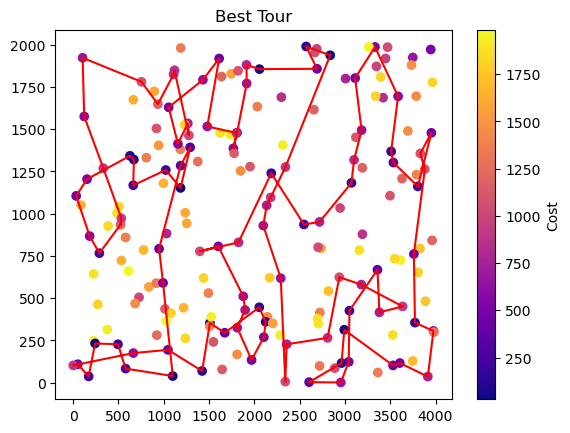

In [2]:
run_experiment(a, 2, True)

Time per iteration: 5.8900654661655425 s
Results: 107600.93(91047 - 123673)
Best solution: [0, 1, 4, 6, 8, 11, 12, 14, 15, 18, 19, 20, 21, 22, 24, 26, 27, 31, 32, 36, 41, 43, 45, 48, 50, 51, 53, 55, 59, 62, 64, 66, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 87, 88, 91, 92, 94, 95, 96, 98, 99, 101, 106, 108, 109, 111, 112, 113, 114, 117, 119, 121, 127, 128, 130, 132, 133, 135, 141, 143, 144, 147, 149, 152, 153, 154, 156, 157, 159, 161, 163, 164, 167, 169, 170, 171, 172, 174, 175, 177, 178, 180, 181, 185, 186, 189, 190, 194, 195, 199]


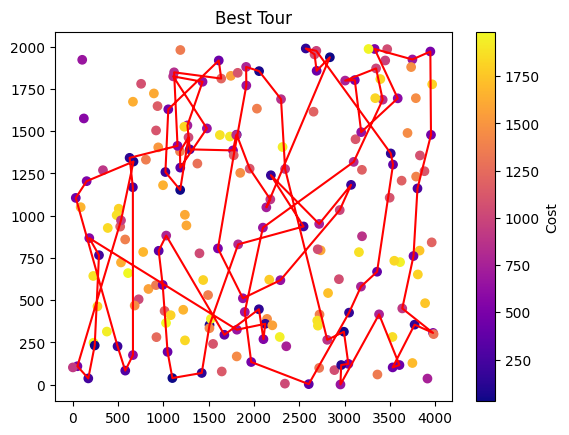

In [2]:
run_experiment(a, 200, True)

Time per iteration: 5.931587839126587 s
Results: 101994.29(82999 - 122660)
Best solution: [0, 2, 4, 5, 8, 12, 16, 18, 19, 21, 24, 25, 26, 29, 31, 33, 34, 36, 37, 38, 40, 43, 44, 50, 51, 52, 53, 55, 57, 59, 61, 63, 64, 66, 67, 69, 71, 73, 79, 80, 82, 84, 88, 89, 91, 92, 95, 99, 101, 103, 107, 114, 115, 117, 119, 121, 122, 127, 129, 130, 131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 153, 154, 156, 157, 158, 159, 162, 163, 165, 168, 169, 170, 172, 174, 179, 181, 182, 183, 185, 190, 192, 196, 197, 198]


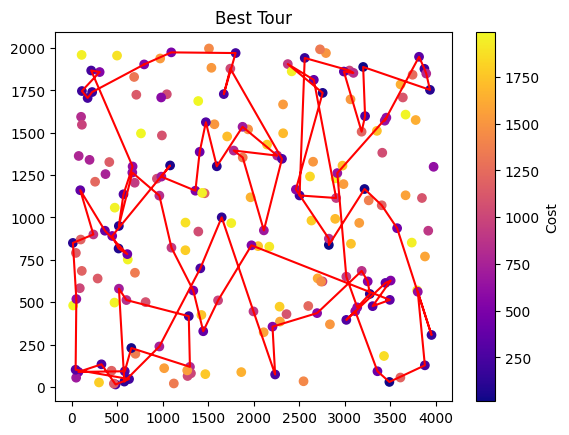

In [ ]:
run_experiment(b, 200, True)

Time per iteration: 6.486540857553482 s
Results: 74505.66(60798 - 84451)
Best solution: [0, 1, 4, 6, 8, 9, 11, 15, 18, 19, 20, 21, 22, 26, 27, 28, 34, 36, 37, 40, 41, 43, 45, 48, 50, 51, 53, 55, 59, 60, 62, 64, 66, 67, 71, 72, 74, 75, 76, 77, 79, 81, 87, 88, 91, 92, 95, 96, 98, 99, 101, 102, 106, 108, 109, 110, 112, 113, 114, 117, 119, 121, 125, 126, 127, 128, 130, 132, 134, 135, 137, 141, 143, 144, 147, 149, 152, 153, 154, 157, 158, 159, 161, 163, 164, 167, 169, 170, 171, 174, 175, 177, 178, 185, 186, 189, 192, 194, 195, 199]


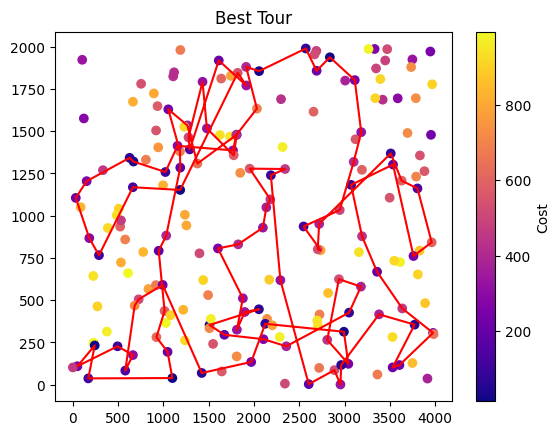

In [ ]:
run_experiment(c, 200, True)

Time per iteration: 6.400287551879883 s
Results: 73554.395(58595 - 87352)
Best solution: [0, 2, 4, 5, 8, 12, 14, 16, 18, 19, 24, 29, 31, 33, 34, 37, 40, 44, 51, 52, 53, 55, 57, 58, 59, 61, 63, 64, 65, 66, 67, 69, 71, 72, 73, 79, 80, 81, 82, 88, 89, 91, 92, 95, 97, 99, 101, 102, 103, 107, 109, 113, 114, 115, 117, 119, 121, 122, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 153, 157, 159, 162, 163, 165, 169, 171, 172, 174, 179, 180, 182, 183, 185, 188, 189, 190, 193, 196, 197, 198]


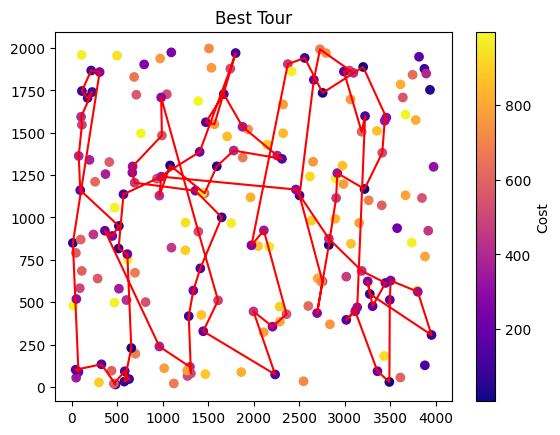

In [ ]:
run_experiment(d, 200, True)

### Objective function values:

| Algorithm | Instance A  | Instance B   | Instance C   | Instance D   |
|-----------|----------|----------|----------|----------|
| steepestLS_2e_r (baseline) | 77901.29 (75066 - 81579) | 71346.28 (68084 - 76956) |  51452.025 (49014 - 54324) | 48361.47 (45919 - 51853) |
| LS_previous_deltas | 107600.93(91047 - 123673) | 101994.29(82999 - 122660) | 74505.66(60798 - 84451) | 73554.395(58595 - 87352) |

| Methods | Instance A | Instance B | Instance C | Instance D |
|-----------|----------|----------|----------|----------|
| baseline | 7.262 | 8.287 | 7.756 | 7.884 |
| LS_previous_deltas | 5.890 | 5.931 | 6.486 | 6.400 |

#### Conclusions:

Using list of moves brings slight improvement in time efficiency, doesn't improve the results however.